In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

In [3]:
data = pd.read_csv("/content/dataset.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [5]:
data.drop("Unnamed: 83", axis = 1, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [7]:
data.dropna(inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56935 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   56935 non-null  int64  
 1   patient_id                     56935 non-null  int64  
 2   hospital_id                    56935 non-null  int64  
 3   age                            56935 non-null  float64
 4   bmi                            56935 non-null  float64
 5   elective_surgery               56935 non-null  int64  
 6   ethnicity                      56935 non-null  object 
 7   gender                         56935 non-null  object 
 8   height                         56935 non-null  float64
 9   icu_admit_source               56935 non-null  object 
 10  icu_id                         56935 non-null  int64  
 11  icu_stay_type                  56935 non-null  object 
 12  icu_type                       56935 non-null 

<ipython-input-9-9e0945c863c7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = "bwr")


<Axes: >

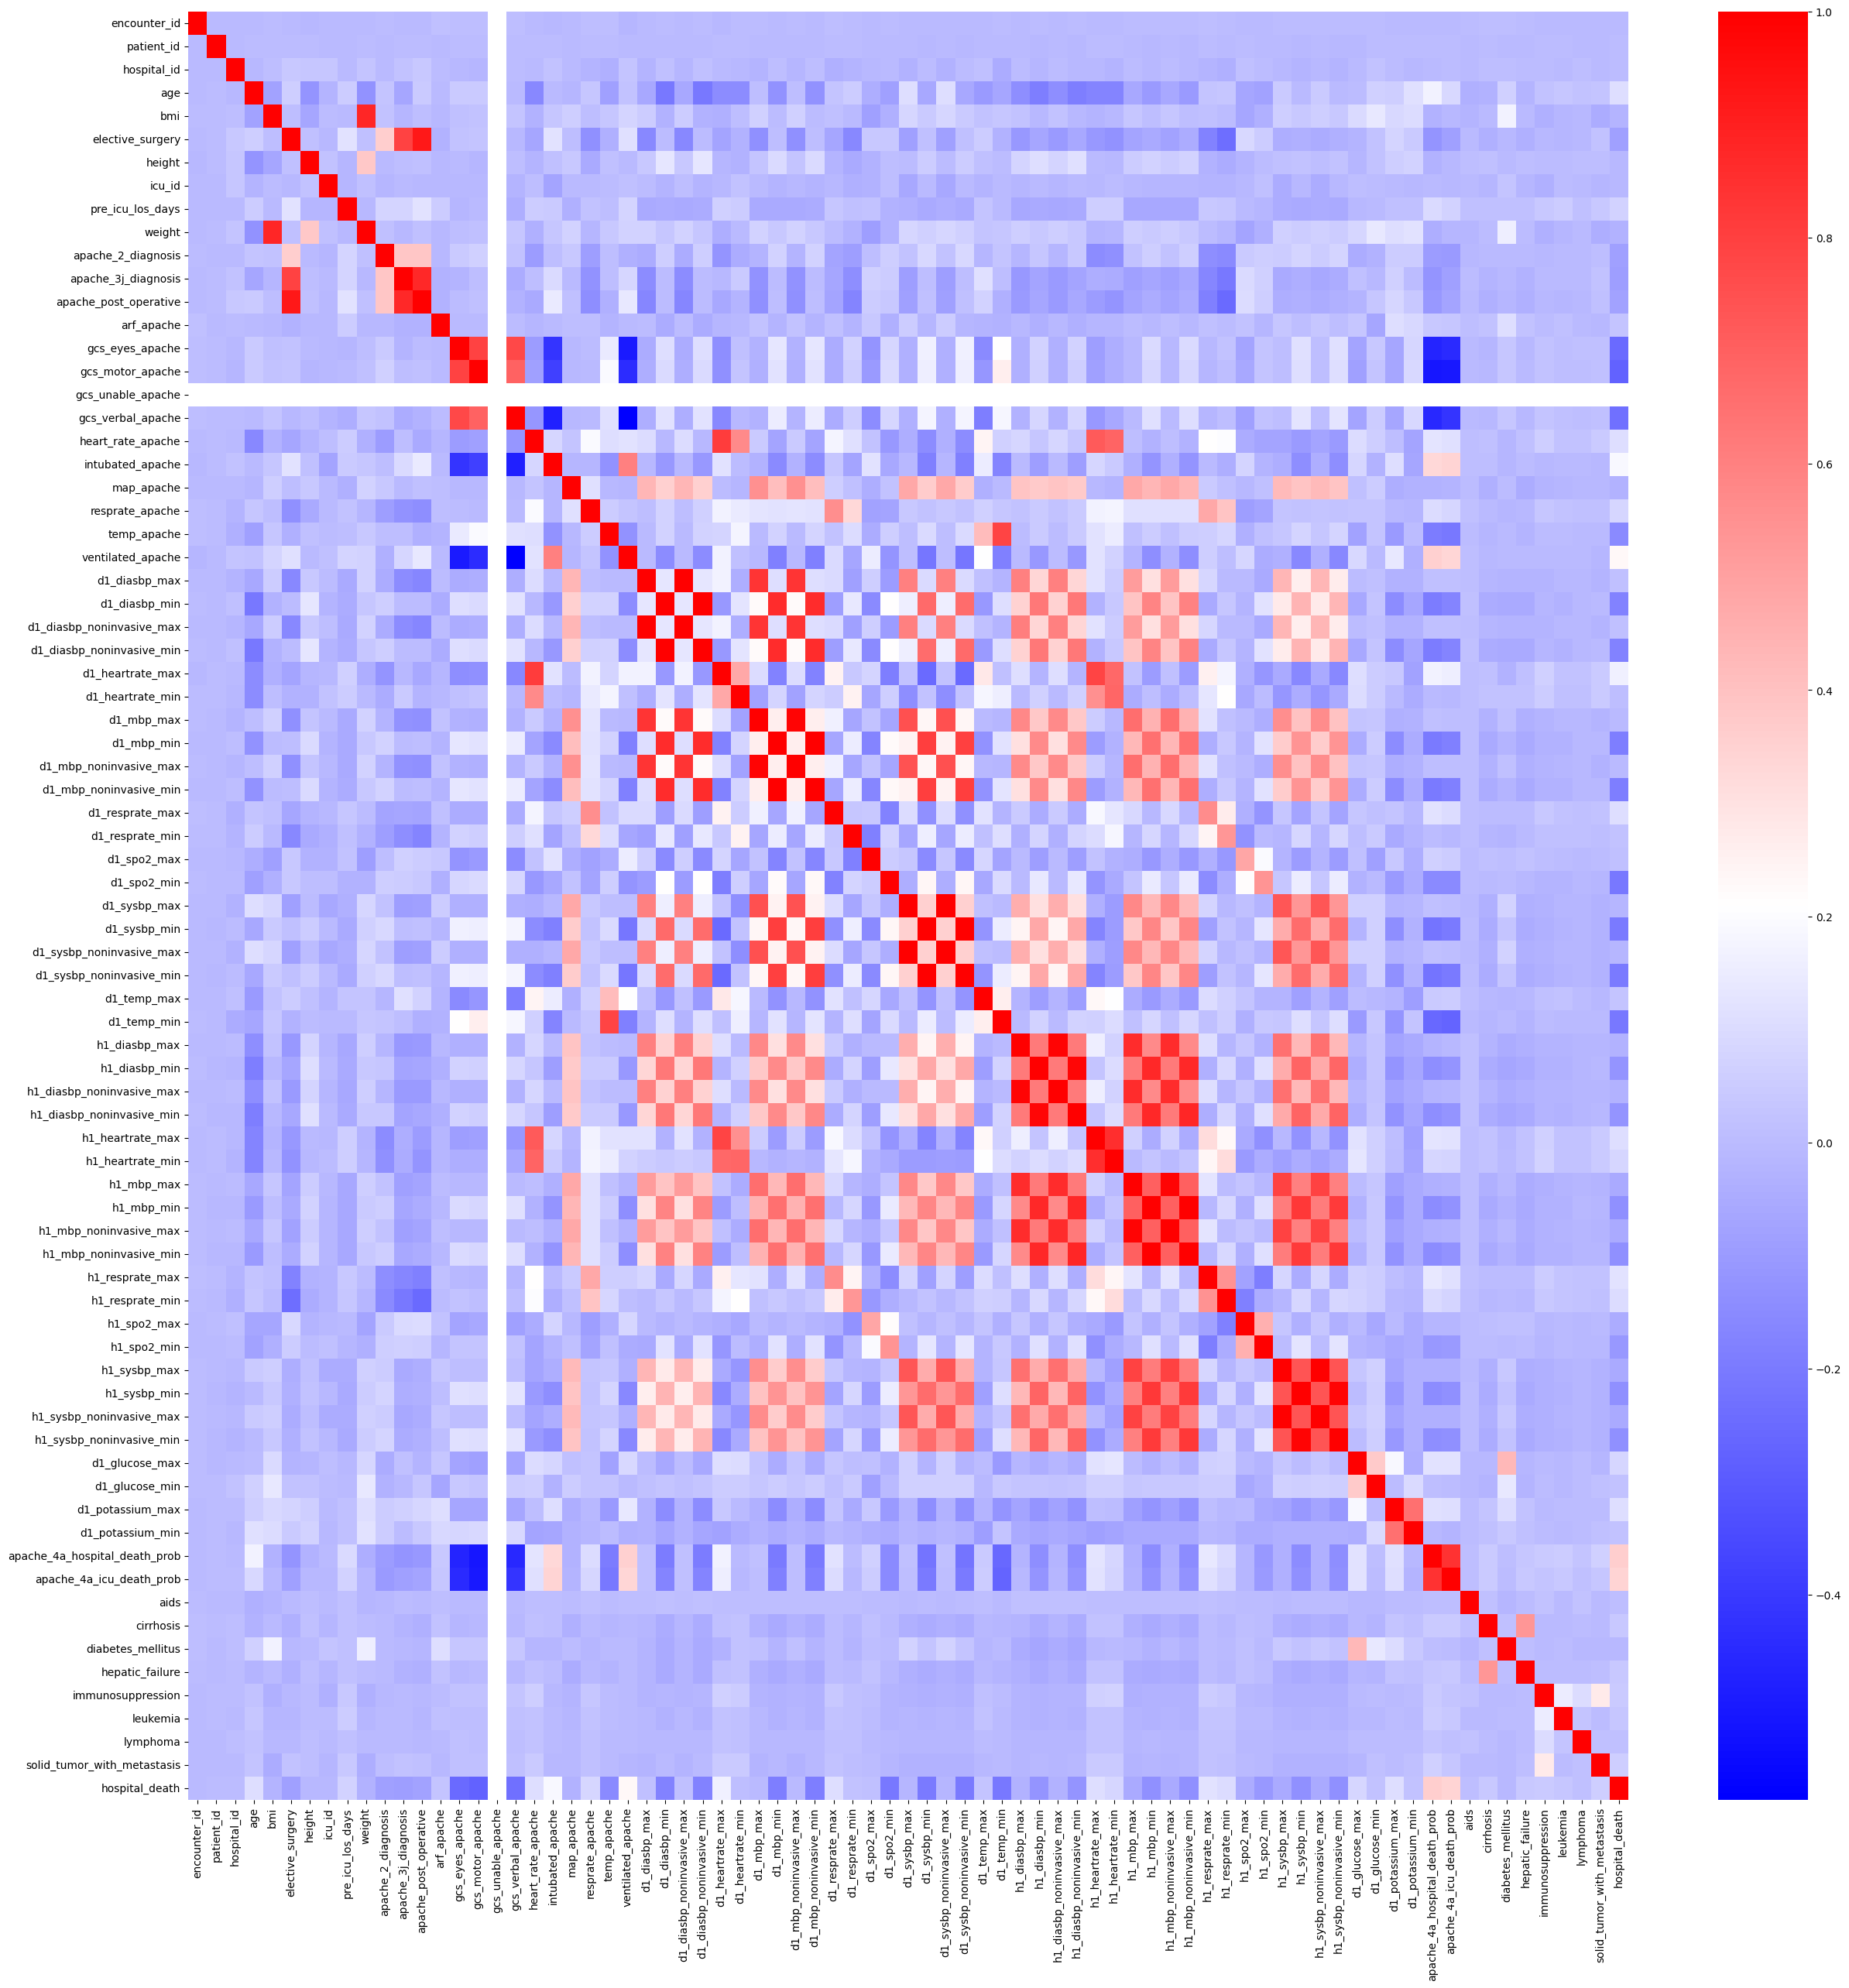

In [9]:
plt.figure(figsize = (30, 30))
sns.heatmap(data.corr(), cmap = "bwr")

In [10]:
data.gcs_unable_apache.unique()

array([0.])

In [11]:
dunkel = [6, 7, 9, 11, 12, 81, 82]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56935 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   56935 non-null  int64  
 1   patient_id                     56935 non-null  int64  
 2   hospital_id                    56935 non-null  int64  
 3   age                            56935 non-null  float64
 4   bmi                            56935 non-null  float64
 5   elective_surgery               56935 non-null  int64  
 6   ethnicity                      56935 non-null  object 
 7   gender                         56935 non-null  object 
 8   height                         56935 non-null  float64
 9   icu_admit_source               56935 non-null  object 
 10  icu_id                         56935 non-null  int64  
 11  icu_stay_type                  56935 non-null  object 
 12  icu_type                       56935 non-null 

In [13]:
x = data.drop(labels = ["apache_3j_bodysystem", "apache_2_bodysystem", "hospital_death", "ethnicity", "icu_type","icu_stay_type", "gender", "icu_admit_source"], axis = 1)
y = data.hospital_death

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45548 entries, 89250 to 90602
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   45548 non-null  int64  
 1   patient_id                     45548 non-null  int64  
 2   hospital_id                    45548 non-null  int64  
 3   age                            45548 non-null  float64
 4   bmi                            45548 non-null  float64
 5   elective_surgery               45548 non-null  int64  
 6   height                         45548 non-null  float64
 7   icu_id                         45548 non-null  int64  
 8   pre_icu_los_days               45548 non-null  float64
 9   weight                         45548 non-null  float64
 10  apache_2_diagnosis             45548 non-null  float64
 11  apache_3j_diagnosis            45548 non-null  float64
 12  apache_post_operative          45548 non-n

In [19]:
model_0 = Pipeline([
    ("preprocessing", MinMaxScaler()),
    ("model", KNeighborsClassifier())
])
model_0.fit(X_train, y_train)
print(f"Test accuracy: {model_0.score(X_test, y_test)*100}%")

Test accuracy: 91.43760428558882%


In [20]:
model_1 = Pipeline([
    ("preprocessing", MinMaxScaler()),
    ("model", DecisionTreeClassifier())
])
model_1.fit(X_train, y_train)
print(f"Test accuracy: {model_1.score(X_test, y_test)*100}%")

Test accuracy: 88.09168349872661%


In [22]:
model_2 = Pipeline([
    ("preprocessing", MinMaxScaler()),
    ("model", LogisticRegression())
])
model_2.fit(X_train, y_train)
print(f"Test accuracy: {model_2.score(X_test, y_test)*100}%")

Test accuracy: 92.40361816106086%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
